In [3]:
'''
AUTHOR: Andrea Marín Domingo
DATE: 12/07/2022
OBJECTIVE: Creation of an ethical individual Algorithm where it returns the best of the individuals of a population, 
generation after generation.
'''



'\nAUTHOR: Andrea Marín Domingo\nDATE: 12/07/2022\nOBJECTIVE: Creation of an ethical individual Algorithm where it returns the best of the individuals of a population, \ngeneration after generation.\n'

### **LIBRARY**

In [4]:
#BOOKSTORES USED
import random
import numpy as np
import random as rd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl


### **FIRST GENERATION**

In [5]:

# VARIABLES
number_of_genes = 15 # Give an incoming number of genes
population_size = 100  # Give an incoming size of poblation
individual = np.arange(number_of_genes)  # cromosoma
generations = 150  # Give an incoming number of generations

# GEN LIST 
lat_lon_individual=[]

for _ in individual:
    aux=(rd.randint(0,500), rd.randint(0,500)) # indicates lat and long positions
    lat_lon_individual.append(aux) # we add values (aux) to the list


# FITNESS FUNCTION
def fitness(lista):
    distance = 0
    c1 = lista[0]
    for c2 in lista[1:]:
        distance += np.sqrt(((lat_lon_individual[c1][0]-lat_lon_individual[c2][0])**2) + ((lat_lon_individual[c1][1]-lat_lon_individual[c2][1])**2))
        c1 = c2
    return round(distance, 2)

# GENERATION OF INDIVIDUALS - CROSSOVER AND MUTATION
def generate_individual():
    return list(np.random.permutation(len(individual)))


 # Crossover
def crossover(ind1, ind2):
    crossover_point = np.random.randint(1, len(individual))

    ind1_left = ind1[:crossover_point]
    ind1_right = ind1[crossover_point:]
 
    ind2_left = ind2[0:crossover_point]
    ind2_right = ind2[crossover_point:]

    pool_1 = set(ind1)-(set(ind1_left)|set(ind2_right)) # (|)  creates a unified set of the two sets
    
    pool_2 = set(ind2)-(set(ind2_left)|set(ind1_right))

    offspring1 = ind1_left 
    for e in ind2_right:
        if e not in ind1_left:
            offspring1.append(e)
        else:
            offspring1.append(pool_1.pop())
    
    offspring2 = ind2_left
    for e in ind1_right:
        if e not in ind2_left:
            offspring2.append(e)
        else:
            offspring2.append(pool_2.pop())
    
    return offspring1, offspring2 


# Mutation
def mutate(ind):
    mutate_rate = np.random.rand()
    if mutate_rate <= 0.05:
        index1 = np.random.randint(len(ind))
        index2 = np.random.randint(len(ind))

        aux = ind[index1] 
        ind[index1] = ind[index2]
        ind[index2] = aux
    return ind


### *TESTS*

In [6]:
ind1 = generate_individual()
ind2 = generate_individual()

print(ind1)
print(ind2)

print(crossover(ind1, ind2))

print(mutate(ind1))


[11, 8, 7, 14, 13, 6, 2, 12, 5, 4, 1, 10, 0, 3, 9]
[13, 2, 9, 3, 8, 14, 7, 12, 6, 10, 1, 0, 5, 4, 11]
([11, 8, 7, 14, 13, 6, 2, 12, 5, 10, 1, 0, 9, 4, 3], [13, 2, 9, 3, 8, 14, 7, 12, 6, 4, 1, 10, 0, 11, 5])
[11, 8, 7, 14, 13, 6, 2, 12, 5, 4, 1, 10, 0, 3, 9]


### **NEXT GENERATION**

In [7]:
# CREAR UNA POBLACION
def populate(n):
    individuals = []
    for _ in range(n):
        individuals.append(generate_individual())
    return individuals

population = populate(population_size)

def fitness_population(population):
    fitness_values = []
    for individual in population:
        fitness_values.append(fitness(individual))
    return fitness_values

In [8]:
pop = populate(population_size)

the_bests = []  #Create a list of the best genes of poblation in this generation

for _ in range(generations):
    new_pop = []  #Create a list of the new poblation
    pop_fit = fitness_population(pop)
    fitness_index = np.argsort(pop_fit)

    best1 = pop[fitness_index[0]]
    best2 = pop[fitness_index[1]]

    the_bests.append(fitness(best1))

    print("Best :",best1," with fitness:", fitness(best1))
    
    new_pop.append(best1)
    new_pop.append(best2)

    for c in range(int((population_size-2)/2)):
        parents_index = np.random.choice(fitness_index[:10], size=2, replace=False)
        father = pop[parents_index[0]]
        mother = pop[parents_index[1]]
        son1, son2 = crossover(father, mother)

        son1 = mutate(son1)
        son2 = mutate(son2)

        new_pop.append(son1)
        new_pop.append(son2)

    pop = new_pop


Best : [2, 6, 1, 9, 8, 10, 5, 4, 0, 12, 13, 7, 14, 3, 11]  with fitness: 2505.44
Best : [12, 2, 1, 9, 8, 10, 5, 4, 0, 11, 13, 7, 14, 3, 6]  with fitness: 2225.53
Best : [11, 2, 1, 9, 8, 10, 5, 4, 0, 12, 13, 7, 14, 3, 6]  with fitness: 2024.72
Best : [11, 2, 1, 9, 8, 10, 5, 4, 0, 12, 13, 6, 3, 14, 7]  with fitness: 1959.4
Best : [8, 9, 1, 3, 6, 10, 2, 11, 4, 5, 0, 12, 13, 14, 7]  with fitness: 1764.58
Best : [8, 9, 1, 2, 11, 10, 5, 4, 0, 12, 13, 6, 3, 14, 7]  with fitness: 1719.36
Best : [8, 9, 1, 2, 11, 10, 5, 4, 0, 12, 13, 6, 3, 14, 7]  with fitness: 1719.36
Best : [8, 9, 1, 2, 11, 10, 5, 4, 0, 12, 13, 6, 3, 14, 7]  with fitness: 1719.36
Best : [8, 9, 1, 2, 11, 10, 13, 4, 0, 12, 5, 6, 3, 14, 7]  with fitness: 1511.24
Best : [8, 9, 1, 2, 11, 10, 13, 4, 0, 12, 5, 6, 3, 14, 7]  with fitness: 1511.24
Best : [8, 9, 1, 2, 11, 10, 13, 4, 0, 5, 12, 6, 3, 14, 7]  with fitness: 1504.81
Best : [8, 1, 9, 2, 11, 10, 13, 4, 0, 12, 5, 6, 3, 14, 7]  with fitness: 1495.92
Best : [8, 1, 9, 2, 11, 10, 1

### **VISUALIZATION**

In [9]:
#Style of graphic
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

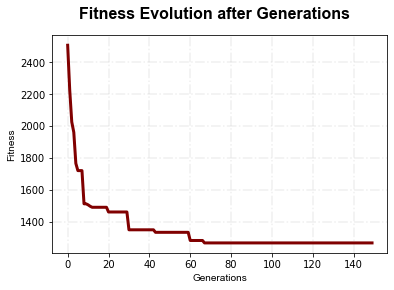

In [16]:
#Create a graphic
from matplotlib.pyplot import ylabel


plt.plot(the_bests, color = 'Maroon', linewidth = 3)
plt.suptitle('Fitness Evolution after Generations', fontfamily = 'arial',
                    fontweight = 'bold', fontsize = 16 )
plt.xlabel('Generations', fontname = 'arial' ,fontsize = 10, fontweight = 'light')
plt.ylabel('Fitness', fontname = 'arial' ,fontsize = 10, fontweight = 'light')
plt.grid(alpha = 0.2, linestyle = '-.', linewidth = 1.5)
plt.style.use('seaborn-pastel') 
plt.savefig("FitEvolution.jpg") #save the graphic
plt.show()
